# In this Notebook I am going to Work on Mnist Dataset.


# What to Do In this Assignment

- Import Required Libraries.
- Load Dataset
- Train Dataset
- Check Accuracy

# **Importing** Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score

# **Loading** Dataset **(Mnist)**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

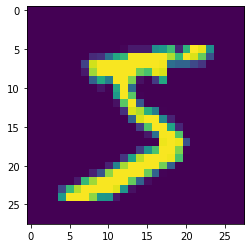

In [6]:

plt.imshow(X_train[0])

## I am dividing each arrary to 255, because due to this all values will be get in 0 or 1

In [7]:
X_train = X_train/255
X_test = X_test/255

# **Creating** Our **Model**

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-trai

In this model i have added 4 dense layers, these will help to improve accuracy

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3173 - accuracy: 0.9071 - val_loss: 0.1423 - val_accuracy: 0.9594
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1210 - accuracy: 0.9639 - val_loss: 0.1214 - val_accuracy: 0.9653
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.1101 - val_accuracy: 0.9677
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.1017 - val_accuracy: 0.9688
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.0998 - val_accuracy: 0.9717
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.1080 - val_accuracy: 0.9711
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0908 - val_accuracy

In [12]:
y_prob = model.predict(X_test)

## **Predicted** Values

In [27]:
y_pred = y_prob.argmax(axis=1)
y_pred

[7 2 1 ... 4 5 6]


In [14]:
accuracy_score(y_test, y_pred)

0.9743

# After training Accuracy i am getting 97.43 %

# Test - 1

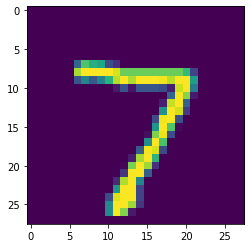

In [22]:
plt.imshow(X_test[0])

In [24]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])

# Successfull, Model predicted right Digit

# Test - 2

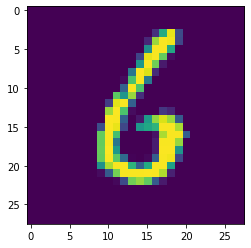

In [25]:
plt.imshow(X_test[50])

In [26]:
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

array([6])

# Successfull, Model Predicted right Digit